<h3><font color="black">ECE 2195 HW5 Problem 1</font></h3>

<h4><font color="black">Part 1</font></h4>

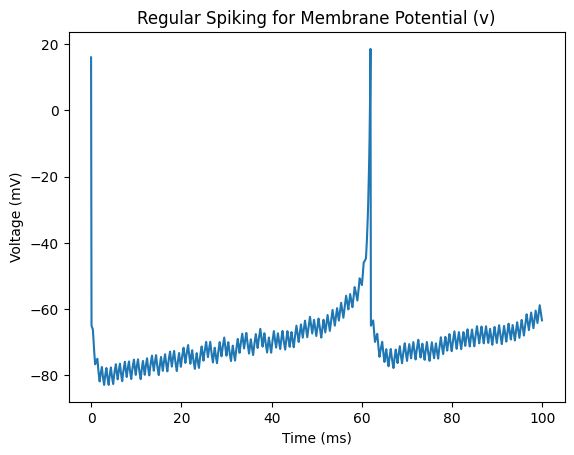

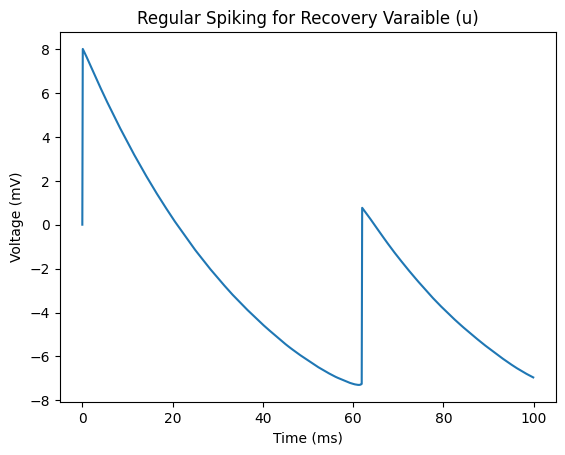

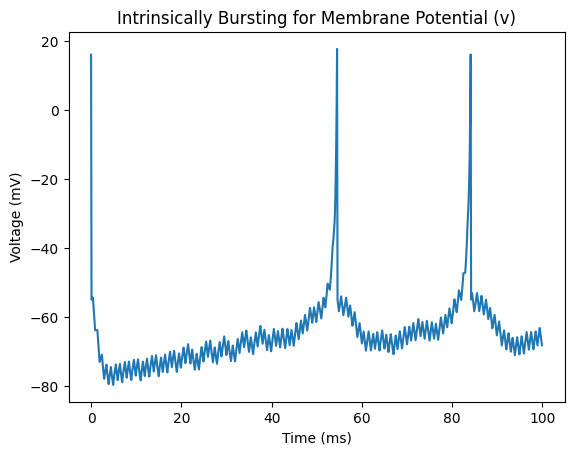

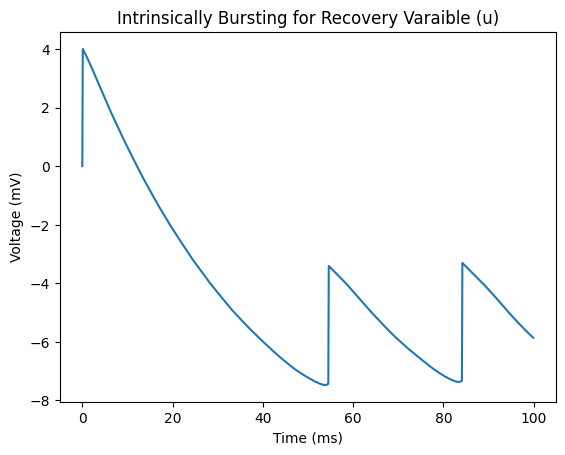

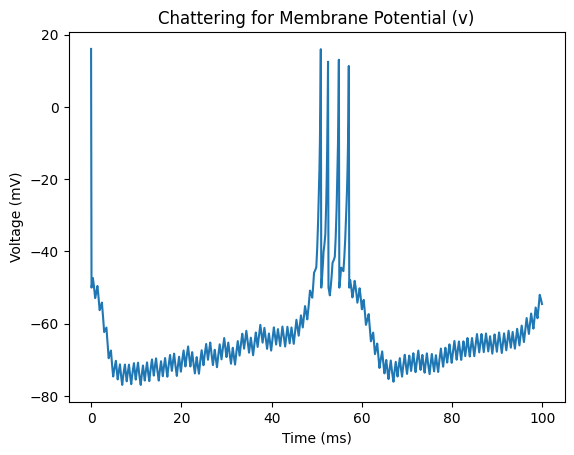

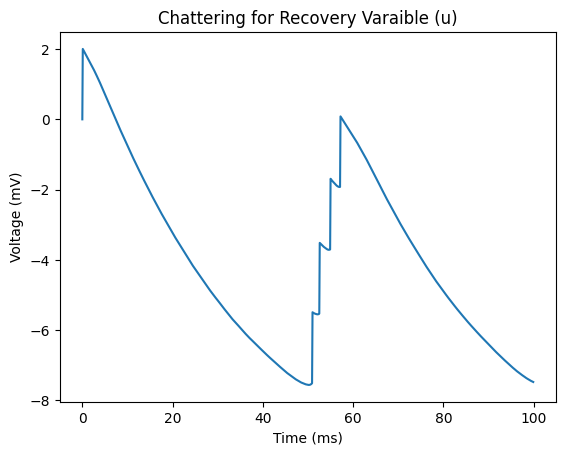

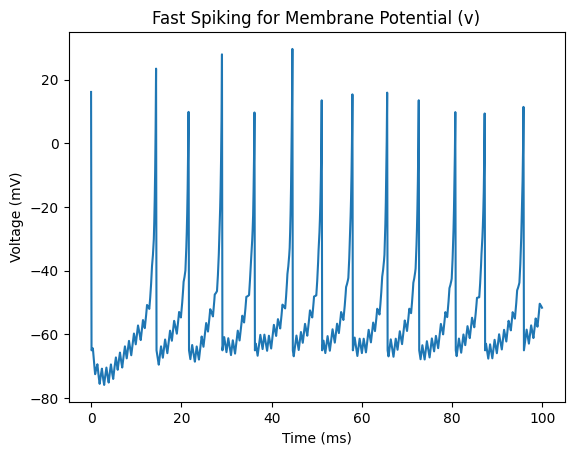

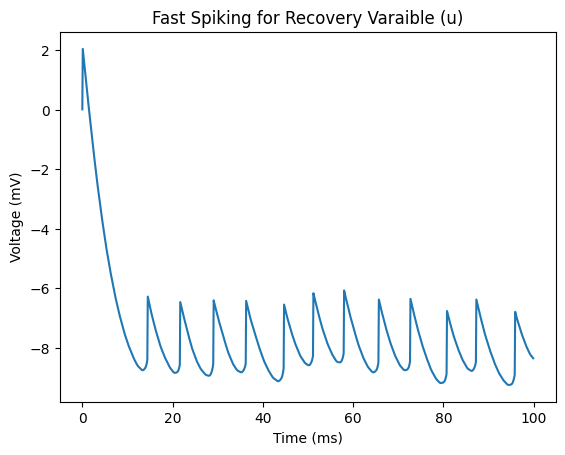

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Initialize variables
a = 0.02 # Describes the time scale of the recovery variable u
b = 0.2 # Describes the sensitivity of u to the subthreshold fluctuations of the mebrane potential v
c = -65 # Describes the after-spike reset value of the membrane potential v caused by the caused by the fast high-threshold K+ conductances
d = 2 # Describes after-spike reset of u caused by slow high-threshold Na+ and K+ conductances

# Excitatory
c_rs = -65 # Deep voltage reset for regular spiking
d_rs = 8 # Large after-jump spike of u for regular spiking

c_ib = -55 # High voltage reset for intrinsically bursting
d_ib = 4 # Large after-jump spike of u for intrinsically bursting

c_ch = -50 # Very high voltage reset for chattering
d_ch = 2 # Moderate after-jump spike of u for chattering

# Inhibitory
a_fs = 0.1 # Fast recovery for fast spiking

# Initialize time and time step
dt = 0.1
time = np.arange(0, 100, dt)

# Set input current to a pseudorandom even integer from 0 to 20 inclusive
# I = random.randrange(0, 21, 2)
I = 0.5 *20*(signal.square(2 * np.pi * time) + 1)

# Initialize arrays
v_array = np.zeros((4, time.shape[0]))
u_array = np.zeros((4, time.shape[0]))

# Create dictionary of variables for the modes of operation
modes = {
        'a': [a, a, a, a_fs],
        'b': [b, b, b, b],
        'c': [c_rs, c_ib, c_ch, c],
        'd': [d_rs, d_ib, d_ch, d]
}

# Function for Izhikevich neuron model
def izhikevich(a, b, c, d, dt, v, u, I):
    dv = 0.04 * v**2 + 5 * v + 140 - u + I # dv/dt
    du = a * (b * v - u) # du/dt
    v += dt * dv
    u += dt * du
    # If v = 30mV, v is reset to c and u is reset to u + d
    if v >= 30:
        v = c
        u = u + d
    return v, u

# Loop through dictionary
for i in range(4):
    # Set v and u
    v = modes['a'][i]
    u = modes['b'][i] * v
    for t in range(len(time)):
        v, u = izhikevich(modes['a'][i], modes['b'][i], modes['c'][i], modes['d'][i], dt, v, u, I[t])
        v_array[i][t] = v
        u_array[i][t] = u

titles = ['Regular Spiking', 'Intrinsically Bursting', 'Chattering', 'Fast Spiking']
# Plot membrane potential (v) and recovery variable (u) for all modes
for i in range(4):
    plt.title(f'{titles[i]} for Membrane Potential (v)')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.plot(time, v_array[i])
    plt.show()
    plt.title(f'{titles[i]} for Recovery Varaible (u)')
    plt.xlabel('Time (ms)')
    plt.ylabel('Voltage (mV)')
    plt.plot(time, u_array[i])
    plt.show()


<h4><font color="black">Part 2</font></h4>

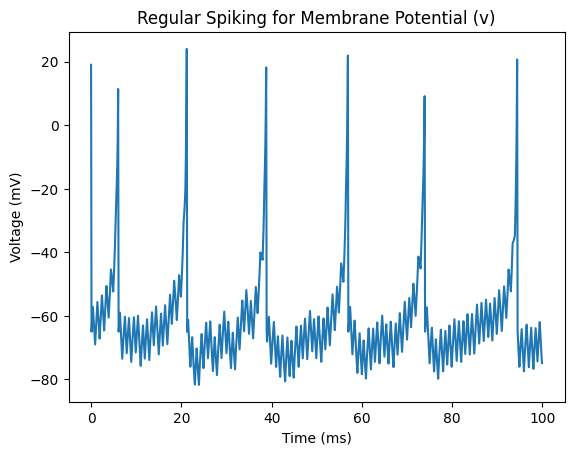

Number of spikes: 6
Spike Frequency (mHz): [0.016666666666666666, 0.006622516556291391, 0.005681818181818182, 0.0055248618784530384, 0.005847953216374269, 0.004901960784313725]


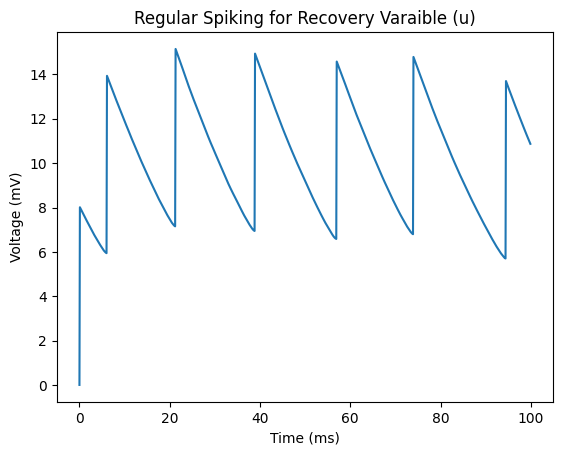

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import signal

# Initialize variables
a = 0.02 # Describes the time scale of the recovery variable u
b = 0.2 # Describes the sensitivity of u to the subthreshold fluctuations of the mebrane potential v
c = -65 # Describes the after-spike reset value of the membrane potential v caused by the caused by the fast high-threshold K+ conductances
d = 2 # Describes after-spike reset of u caused by slow high-threshold Na+ and K+ conductances

# Excitatory
c_rs = -65 # Deep voltage reset for regular spiking
d_rs = 8 # Large after-jump spike of u for regular spiking

c_ib = -55 # High voltage reset for intrinsically bursting
d_ib = 4 # Large after-jump spike of u for intrinsically bursting

c_ch = -50 # Very high voltage reset for chattering
d_ch = 2 # Moderate after-jump spike of u for chattering

# Inhibitory
a_fs = 0.1 # Fast recovery for fast spiking

# Initialize time and time step
dt = 0.1
time = np.arange(0, 100, dt)

# Set input current to a pseudorandom even integer from 0 to 50 inclusive
# I = random.randrange(0, 51, 2)
I = 0.5 *50*(signal.square(2 * np.pi * time) + 1)

# Initialize arrays
v_array = np.zeros((4, time.shape[0]))
u_array = np.zeros((4, time.shape[0]))

# Create dictionary of variables for the modes of operation
modes = {
        'a': [a, a, a, a_fs],
        'b': [b, b, b, b],
        'c': [c_rs, c_ib, c_ch, c],
        'd': [d_rs, d_ib, d_ch, d]
}

# Function for Izhikevich neuron model
def izhikevich(a, b, c, d, dt, v, u, I):
    dv = 0.04 * v**2 + 5 * v + 140 - u + I # dv/dt
    du = a * (b * v - u) # du/dt
    v += dt * dv
    u += dt * du
    # If v = 30mV, v is reset to c and u is reset to u + d
    if v >= 30:
        v = c
        u = u + d
    return v, u

# Set v and u
v = modes['a'][0]
u = modes['b'][0] * v
count = 0
vlast = -1
tnow = 0
tlast = 0
freq = []

# Get varaibles
for t in range(len(time)):
    v, u = izhikevich(modes['a'][0], modes['b'][0], modes['c'][0], modes['d'][0], dt, v, u, I[t])
    v_array[0][t] = v
    u_array[0][t] = u
    if v > 0 and t != 0 and vlast < 0:
        count += 1
        tnow = t
        freq.append(1/(tnow-tlast))
    vlast = v
    tlast = tnow

titles = ['Regular Spiking', 'Intrinsically Bursting', 'Chattering', 'Fast Spiking']
# Plot membrane potential (v) and recovery variable (u) for RS mode
plt.title(f'{titles[0]} for Membrane Potential (v)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.plot(time, v_array[0])
plt.show()
print(f'Number of spikes: {count}')
print(f'Spike Frequency (mHz): {freq}')
plt.title(f'{titles[0]} for Recovery Varaible (u)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')
plt.plot(time, u_array[0])
plt.show()

<h3><font color="black">ECE 2195 HW5 Problem 2</font></h3>

<h4><font color="black">Neural Network Setup</font></h4>

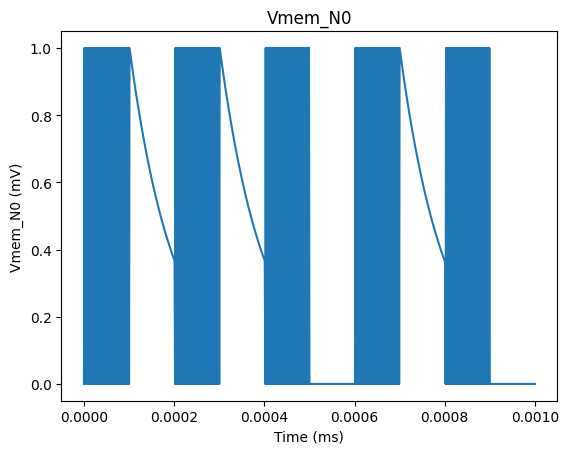

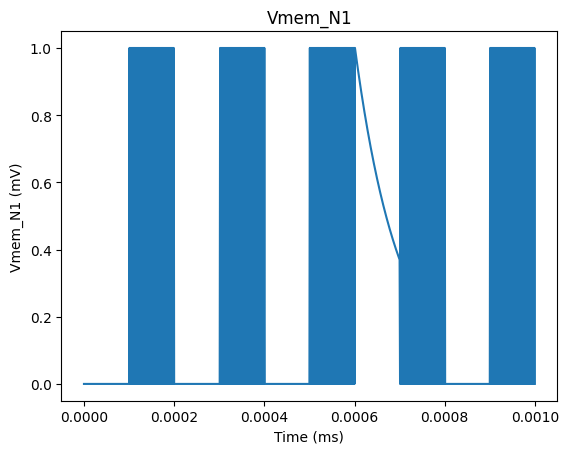

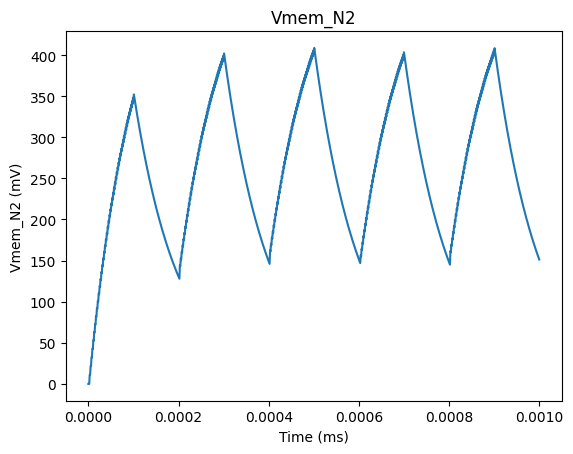

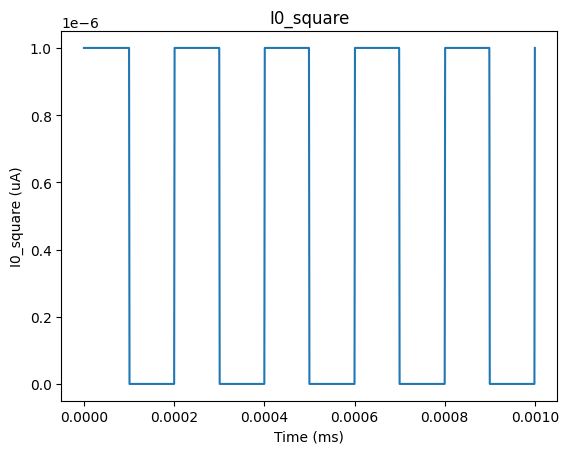

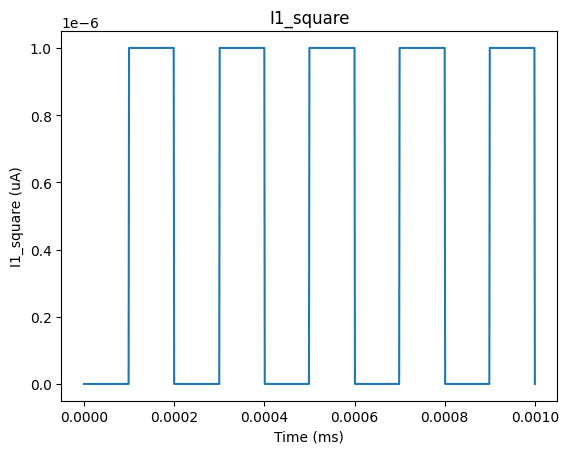

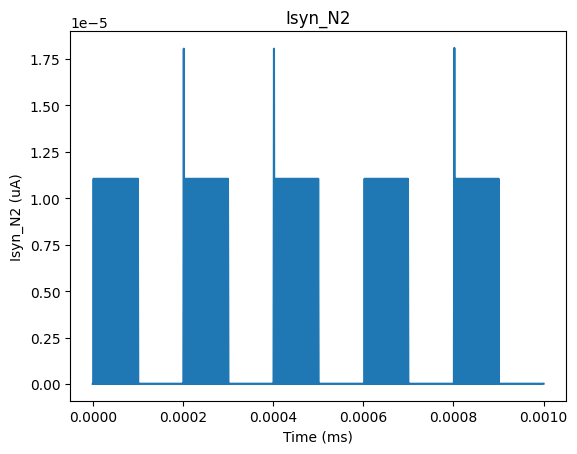

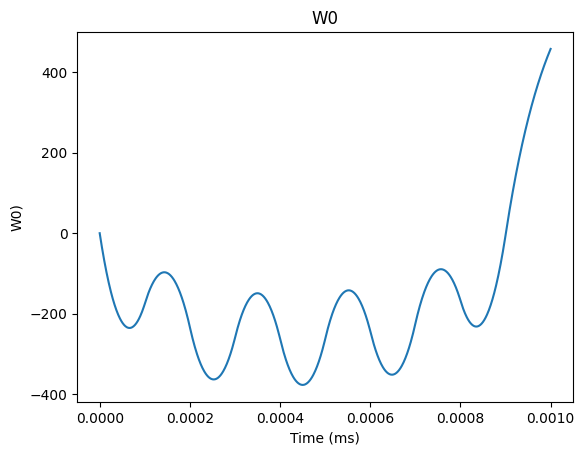

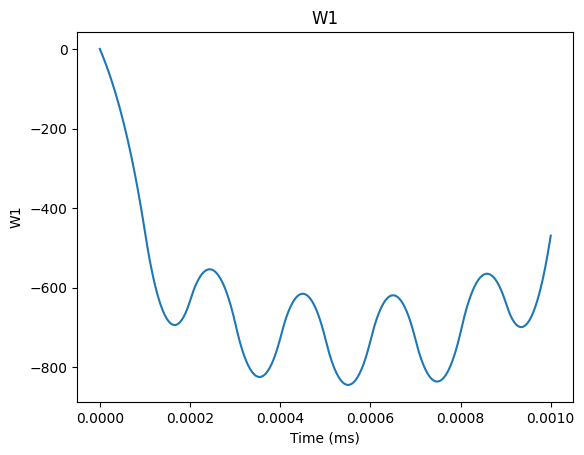

In [33]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

Vthresh = 1
Cmem = 1e-12 #1pF
Erev = 2.0
lrn_rate = 0.2
Gleak = 1e-8
Eleak = 0.0
I0 = 1e-6 #1uA
I1 = 1e-6 #1uA
tau_decay = 10
tau_learn = 100
dt = 1e-6 #1us step size
W0 = 1e-5 #W2 high such that such that even a weak current applied to N0 can evoke a spike for both N0 and N2 
W1 = 1e-8 #W1 low such that N2 does not spike when N1 spikes

# Calculate input synaptic current for neuron N2 only 
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
# Gsyn is the weight change of the synapse (W0 or W1)
def calc_Isyn(Isyn, Gsyn, tspike_pre, tnow, tau_decay, Erev, Vmem):
    Isyn[tnow+1] += Gsyn*np.exp((tspike_pre-tnow)/tau_decay)*(Erev-Vmem[tnow])
    return Isyn

# Calcuate membrane voltage for neurons N0, N1 and N2 - 
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
def calc_Vmem(Vm_init, Isyn, Cmem, dt):
    return Vm_init + np.sum(Isyn, axis=0)*dt/Cmem + Gleak*(Eleak-Vm_init)*dt/Cmem

# STDP Weight update rule - delta(Gsyn) is the weight change of the synapse (W0 or W1)
def train_STDP(lrn_rate, tpre, tpost, tau_learn):
    return lrn_rate*np.sign(tpost-tpre)*np.exp(np.sign(tpre-tpost)*(tpost-tpre)/tau_learn)   

# Your tasks 
# 1. Build a simple neural network as shown in HW5 and initialize W0 and W1 (Gsyn0 and Gsyn1) correctly. 
# 2. Generate input currents I0 and I1. Assume I0 and I1 to be at least 1uA amplitude and applied for 1ms.
# 3. Compute Isyn and Vmem using the predefined functions
# 4. Use STDP rule to calculate change in weights

# Nerual Network Setup 1.
# Generate input currents I0 and I1. Assumming I0 and I1 to be at least 1uA amplitude and applied for 1ms.
time = np.arange(0, 1e-3, dt)
t0 = 1e-6
t1 = 1e-3
cycles = 5
# One cycle with a duty cycle of %50 and a delta of 0.5ms
I0_square = 0.5 *I0*(signal.square(2 * np.pi * cycles * time / t1) + 1)
I1_square = 0.5*I1*(signal.square(2 * np.pi * cycles * time / t1 + np.pi) + 1)
Isyn_N2 = np.zeros(time.shape[0])

# Initialize lists and numpy arrays
tspike_pre_N0 = []
tspike_pre_N1 = []
W0_array = []
W1_array = []
W0_array.append(0)
W1_array.append(0)
Vmem_array_N0 = np.zeros(time.shape[0])
Vmem_array_N1 = np.zeros(time.shape[0])
Vmem_array_N2 = np.zeros(time.shape[0])

# First loop
for tnow in range(len(time)-1):
    tspike_pre = tnow + 1
    Vmem_array_N0[tnow+1] = calc_Vmem(Vmem_array_N0[tnow], I0_square[tnow], Cmem, dt)
    Vmem_array_N1[tnow+1] = calc_Vmem(Vmem_array_N1[tnow], I1_square[tnow], Cmem, dt)
    
    # Nerual Network Setup 2. 3. and 4.
    if Vmem_array_N0[tnow+1] > Vthresh:
        Vmem_array_N0[tnow+1] = 0
        tspike_pre_N0.append(tspike_pre)
        Isyn_N2 = calc_Isyn(Isyn_N2, W0, tspike_pre, tnow, tau_decay, Erev, Vmem_array_N0)
    if Vmem_array_N1[tnow+1] > Vthresh:
        Vmem_array_N1[tnow+1] = 0
        tspike_pre_N1.append(tspike_pre)
        Isyn_N2 = calc_Isyn(Isyn_N2, W1, tspike_pre, tnow, tau_decay, Erev, Vmem_array_N1)
        
# Second loop
for tnow in range(len(time)-1):
    
    Vmem_array_N2[tnow+1] = calc_Vmem(Vmem_array_N2[tnow], Isyn_N2[tnow], Cmem, dt)
        
    # Nerual Network Setup 5.
    for tspike_pre in tspike_pre_N0:
        W0 += train_STDP(lrn_rate, tspike_pre, tnow+1, tau_learn)
    for tspike_pre in tspike_pre_N1:
        W1 += train_STDP(lrn_rate, tspike_pre, tnow+1, tau_learn)
    
    W0_array.append(W0)
    W1_array.append(W1)
    
plt.title('Vmem_N0')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N0 (mV)')
plt.plot(time, Vmem_array_N0)
plt.show()

plt.title('Vmem_N1')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N1 (mV)')
plt.plot(time, Vmem_array_N1)
plt.show()

plt.title('Vmem_N2')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N2 (mV)')
plt.plot(time, Vmem_array_N2)
plt.show()

plt.title('I0_square')
plt.xlabel('Time (ms)')
plt.ylabel('I0_square (uA)')
plt.plot(time, I0_square)
plt.show()

plt.title('I1_square')
plt.xlabel('Time (ms)')
plt.ylabel('I1_square (uA)')
plt.plot(time, I1_square)
plt.show()

plt.title('Isyn_N2')
plt.xlabel('Time (ms)')
plt.ylabel('Isyn_N2 (uA)')
plt.plot(time, Isyn_N2)
plt.show()

plt.title('W0')
plt.xlabel('Time (ms)')
plt.ylabel('W0)')
plt.plot(time, W0_array)
plt.show()

plt.title('W1')
plt.xlabel('Time (ms)')
plt.ylabel('W1')
plt.plot(time, W1_array)
plt.show()

<h6><font color="black">Comment: W1 trends downward, having no effect on the outcome at N2.</font></h6>

<h4><font color="black">Associative Learning</font></h4>

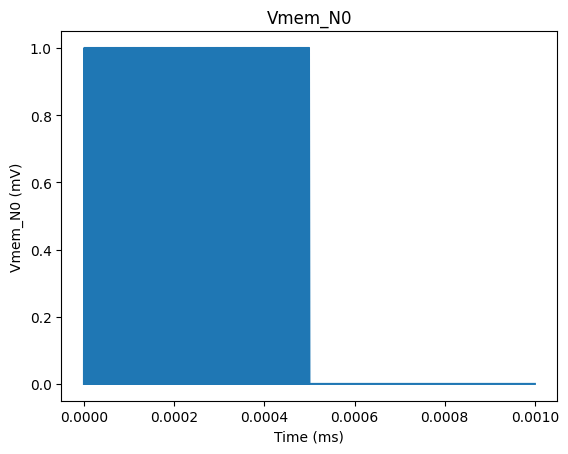

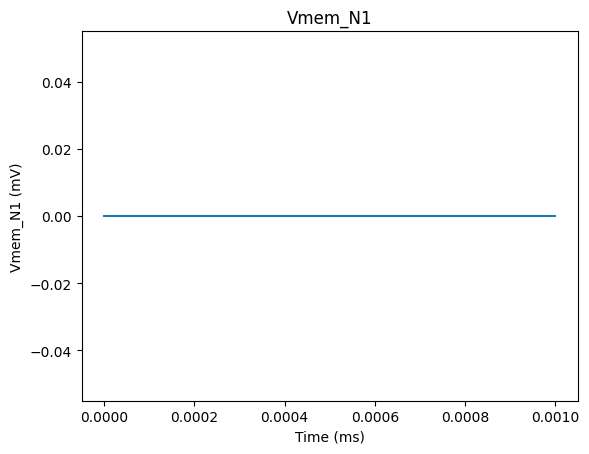

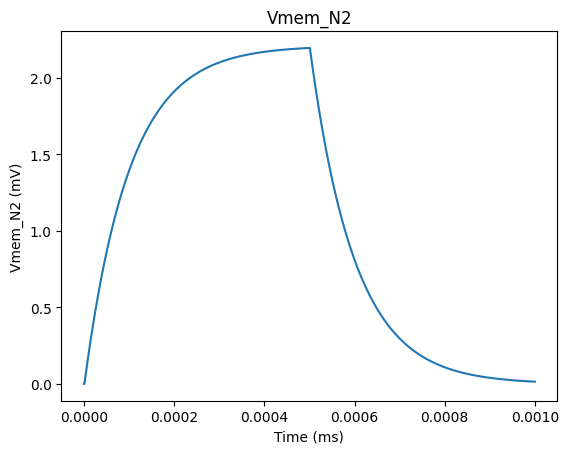

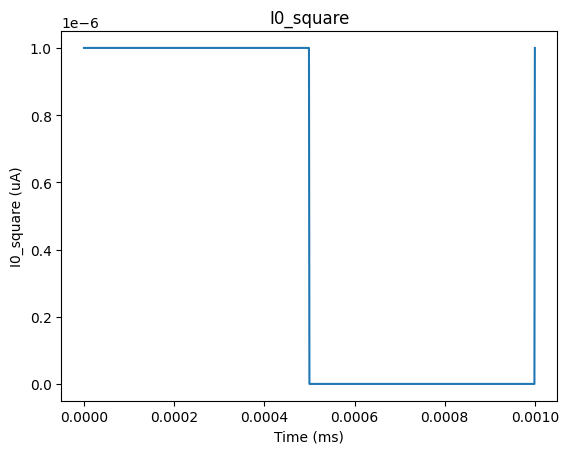

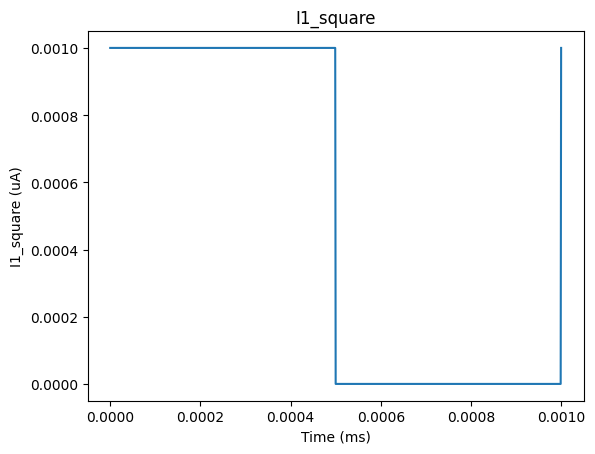

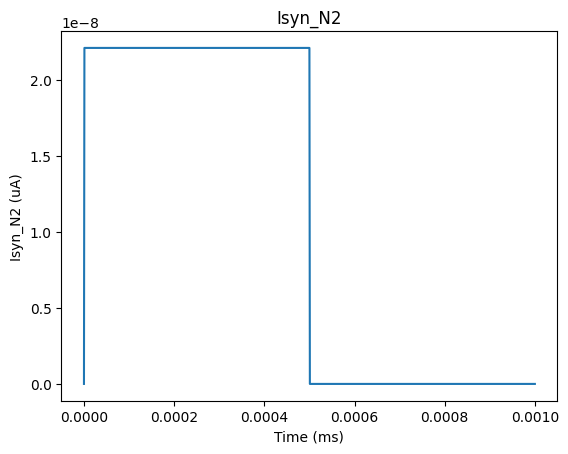

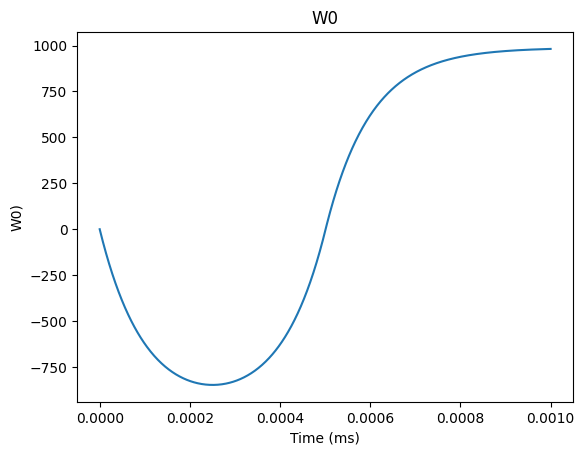

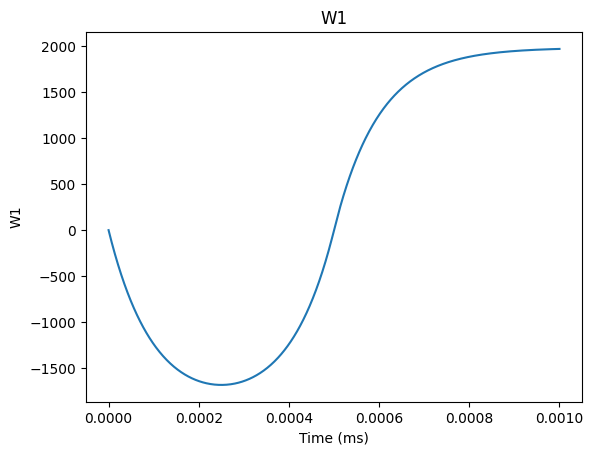

In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

Vthresh = 1
Cmem = 1e-12 #1pF
Erev = 2.0
lrn_rate = 0.2
Gleak = 1e-8
Eleak = 0.0
I0 = 1e-6 #1uA
I1 = 1e-3 #1mA
tau_decay = 10
tau_learn = 100
dt = 1e-6 #1us step size
# Associative Learning 1.
W0 = 1e-5 #W2 high such that such that even a weak current applied to N0 can evoke a spike for both N0 and N2 
W1 = 1e-8 #W1 low such that N2 does not spike when N1 spikes

# Calculate input synaptic current for neuron N2 only 
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
# Gsyn is the weight change of the synapse (W0 or W1)
def calc_Isyn(Isyn, Gsyn, tspike_pre, tnow, tau_decay, Erev, Vmem):
    Isyn[tnow+1] += Gsyn*np.exp((tspike_pre-tnow)/tau_decay)*(Erev-Vmem[tnow])
    return Isyn

# Calcuate membrane voltage for neurons N0, N1 and N2 - 
# for N0 and N1 Isyn is external input current, for N2 Isyn is sum of synaptic input currents
def calc_Vmem(Vm_init, Isyn, Cmem, dt):
    return Vm_init + np.sum(Isyn, axis=0)*dt/Cmem + Gleak*(Eleak-Vm_init)*dt/Cmem

# STDP Weight update rule - delta(Gsyn) is the weight change of the synapse (W0 or W1)
def train_STDP(lrn_rate, tpre, tpost, tau_learn):
    return lrn_rate*np.sign(tpost-tpre)*np.exp(np.sign(tpre-tpost)*(tpost-tpre)/tau_learn)   

# Your tasks 
# 1. Build a simple neural network as shown in HW5 and initialize W0 and W1 (Gsyn0 and Gsyn1) correctly. 
# 2. Generate input currents I0 and I1. Assume I0 and I1 to be at least 1uA amplitude and applied for 1ms.
# 3. Compute Isyn and Vmem using the predefined functions
# 4. Use STDP rule to calculate change in weights
# 5. Demonstrate associative learning as described in problem 3, by tuning I0, I1, W0 and W1.

# Generate input currents I0 and I1. Assumming I0 and I1 to be at least 1uA amplitude and applied for 1ms.
time = np.arange(0, 1e-3, dt)
t0 = 1e-6
t1 = 1e-3
cycles = 1
# One cycle with a duty cycle of %50 and a delta of 0.5ms
I0_square = 0.5 *I0*(signal.square(2 * np.pi * cycles * time / t1) + 1)
I1_square = 0.5*I1*(signal.square(2 * np.pi * cycles * time / t1) + 1)
Isyn_sum = np.array(I0_square+I1_square)
Isyn_sum = np.zeros(time.shape[0])
Isyn_N2 = np.zeros(time.shape[0])

# Initialize lists and numpy arrays
tspike_pre_N0 = []
tspike_pre_N1 = []
W0_array = []
W1_array = []
W0_array.append(0)
W1_array.append(0)
Vmem_array_N0 = np.zeros(time.shape[0])
Vmem_array_N1 = np.zeros(time.shape[0])
Vmem_array_N2 = np.zeros(time.shape[0])

# First loop
for tnow in range(len(time)-1):
    tspike_pre = tnow + 1
    Vmem_array_N0[tnow+1] = calc_Vmem(Vmem_array_N0[tnow], I0_square[tnow], Cmem, dt)
    Vmem_array_N1[tnow+1] = calc_Vmem(Vmem_array_N1[tnow], I1_square[tnow], Cmem, dt)
    
    if Vmem_array_N0[tnow+1] > Vthresh:
        Vmem_array_N0[tnow+1] = 0
        tspike_pre_N0.append(tspike_pre)
        # Associative Learning 4.
        # To check if associative learning works we only get Isyn_N2 from N1
#         Isyn_N2 = calc_Isyn(Isyn_N2, W0, tspike_pre, tnow, tau_decay, Erev, Vmem_array_N0)
    if Vmem_array_N1[tnow+1] > Vthresh:
        Vmem_array_N1[tnow+1] = 0
        tspike_pre_N1.append(tspike_pre)
        Isyn_N2 = calc_Isyn(Isyn_N2, W1, tspike_pre, tnow, tau_decay, Erev, Vmem_array_N1)
    
# Second loop
for tnow in range(len(time)-1):
    
    Vmem_array_N2[tnow+1] = calc_Vmem(Vmem_array_N2[tnow], Isyn_N2[tnow], Cmem, dt)
        
    # Associative Learning 3.
    for tspike_pre in tspike_pre_N0:
        W0 += train_STDP(lrn_rate, tspike_pre, tnow+1, tau_learn)
    for tspike_pre in tspike_pre_N1:
        W1 += train_STDP(lrn_rate, tspike_pre, tnow+1, tau_learn)
    
    W0_array.append(W0)
    W1_array.append(W1)
    
# Check that W1 is increasing much faster than W0. Increase I1 to increase W1.
# Associative Learning 2.
#     print('\nW0')
#     print(W0)
#     print('\nW1')
#     print(W1)

# Associative Learning 5.
# Plot all
plt.title('Vmem_N0')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N0 (mV)')
plt.plot(time, Vmem_array_N0)
plt.show()

plt.title('Vmem_N1')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N1 (mV)')
plt.plot(time, Vmem_array_N1)
plt.show()

plt.title('Vmem_N2')
plt.xlabel('Time (ms)')
plt.ylabel('Vmem_N2 (mV)')
plt.plot(time, Vmem_array_N2)
plt.show()

plt.title('I0_square')
plt.xlabel('Time (ms)')
plt.ylabel('I0_square (uA)')
plt.plot(time, I0_square)
plt.show()

plt.title('I1_square')
plt.xlabel('Time (ms)')
plt.ylabel('I1_square (uA)')
plt.plot(time, I1_square)
plt.show()

plt.title('Isyn_N2')
plt.xlabel('Time (ms)')
plt.ylabel('Isyn_N2 (uA)')
plt.plot(time, Isyn_N2)
plt.show()

plt.title('W0')
plt.xlabel('Time (ms)')
plt.ylabel('W0)')
plt.plot(time, W0_array)
plt.show()

plt.title('W1')
plt.xlabel('Time (ms)')
plt.ylabel('W1')
plt.plot(time, W1_array)
plt.show()

<h6><font color="black">Comment: W1 trends upward (with W0), resulting in N1 having the same effect on N2 as N0 does.</font></h6>